In [16]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install numpy matplotlib scipy librosa nltk num2words==0.5.13 tqdm==4.66.1

Looking in indexes: https://download.pytorch.org/whl/cpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 56.4 kB/s eta 0:00:00a 0:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 62.7 kB/s eta 0:00:00a 0:00:06


In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mokira3d48/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
AUDIO_FILE_SAMPLE = '../samples/lesmis_0001.wav'
TEXT_FILE_SAMPLE = '../samples/transcription.txt'


In [66]:
from string import punctuation

SPACE = ' '
ALPHABET = SPACE + "abcdefghijklmnopqrstuvwxyzàâçéèêëîïôœùûüÿ"
NUMBERS = '0123456789'
VOCAB = NUMBERS + ALPHABET + punctuation
print(VOCAB)

0123456789 abcdefghijklmnopqrstuvwxyzàâçéèêëîïôœùûüÿ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


### Traitement de texte

Avant d'envoyer le texte en entré du modèle, il faut en premier
le transformer en une séquence de nombre d'entier. Cette dernière
se fera en plusieurs étapes :

1. Charger le texte en mémoire de l'ordinateur;
2. Conversion du texte en munuscule (`lower()`);
3. Traitement des mots spéciaux comme les addresses emails et les noms
de domaines;
4. Conversion des nombres en lettres. Par exemple : **1990**
devient **mille neuf cent quatre-vingt dix**;
5. Supprimer les caractères spécials (les ponctuations, le retour à la ligne et autres);
6. Eclater le texte en séquence de caractères;
7. Faire correspondre chaque caractère de la séquence avec sa position
dans l'alphabet de la langue. 

#### Chargement du texte en mémoire

In [25]:
def read_text(file_path):
    with open(file_path, mode='r', encoding='utf-8') as file:
        return file.read()

In [69]:
transcription = read_text(TEXT_FILE_SAMPLE)
print(transcription)

Les débuts du Machine Learning (apprentissage automatique) sont souvent associés à ceux de l'IA avec la création du célèbre 
test de Turing en 1950. Mais c'est en 1959 que le terme “machine learning” apparait pour la 
première fois, utilisé par Arthur Samuel pour son programme créé en 1952 capable d'apprendre à 
jouer aux dames au fil des parties avec une précision de 0.5 au moins. Si vous souhaitez en savoir plus, vous pouvez me contacter sur dr.mokira@gmail.com et me retrouver sur www.linkedin.com. N'oublier pas de faire un virement de 3000$ pour chaque question. Les 12,5 fois représente le 13ème...




#### Transformation en munuscule (ToLower)

In [70]:
transcription = transcription.lower()
print(transcription)

les débuts du machine learning (apprentissage automatique) sont souvent associés à ceux de l'ia avec la création du célèbre 
test de turing en 1950. mais c'est en 1959 que le terme “machine learning” apparait pour la 
première fois, utilisé par arthur samuel pour son programme créé en 1952 capable d'apprendre à 
jouer aux dames au fil des parties avec une précision de 0.5 au moins. si vous souhaitez en savoir plus, vous pouvez me contacter sur dr.mokira@gmail.com et me retrouver sur www.linkedin.com. n'oublier pas de faire un virement de 3000$ pour chaque question. les 12,5 fois représente le 13ème...




#### Traitement des mots spéciaux

In [7]:
def transcrib_email_addr(email_value):
    """
    Function to transcrib the email address into text.
    """
    return email_value.replace('.', SPACE + 'point' + SPACE) \
                      .replace('@', SPACE + 'arobase' + SPACE)

In [8]:
transcrib_email_addr("dr.mokira@gmail.com")

'dr point mokira arobase gmail point com'

In [9]:
def transcrib_domain_name(domain_value):
    """
    Function to transcrib domain name into text.
    """
    return domain_value.replace('www', 'trois' + SPACE + 'w' + SPACE) \
                       .replace('.', SPACE + 'point' + SPACE)

In [10]:
transcrib_domain_name('www.computer.com')

'trois w  point computer point com'

In [11]:
def transcrib_special_char(string):
    return string.replace('$', SPACE + 'dollar' + SPACE) \
                 .replace('#', SPACE + 'hache tag' + SPACE) \
                 .replace('&', SPACE + 'et' + SPACE) \
                 .replace('%', SPACE + 'pourcent' + SPACE)

In [12]:
transcrib_special_char('#code #ia')

' hache tag code  hache tag ia'

AttributeError: 'NoneType' object has no attribute 'end'

In [10]:
import re


class DualSpecialChar:
    """
    Parsing of dual or auto-closed special characters
    contained in text received by argument.
    """
    _PATTERNS = [(re.compile(r'\(.+\)'), "entre parenthèse"),
                 (re.compile(r'\[.+\]'), "entre crochet"),
                 (re.compile(r'«.+»'), "je cite"),
                 (re.compile(r'".+"'), "entre griffe")]

    def _replace(self, text, matchs, message):
        text = text.replace(matchs[0], message, 1)
        text = text.replace(string_matched, '')
        return text

    def transform(self, text):
        """
        Function to transform the auto-closed
        special character to readable text.
        """
        transformed = text
        for pattern, message in self._PATTERNS:
            results = pattern.match(transformed)
            if results and len(results) > 0:
                transformed = self._replace(transformed, results[0], message)
        return transformed


#### Conversion des nombres en lettre

In [15]:
from num2words import num2words


def num_to_text(num):
    """
    Function which allows to convert to any number
    (integer, real) to text.

    :param num: The number will be transcribe to text.
    :type num: `int`|`float`
    :rtype: `str`
    """
    res = num2words(num, lang='fr')
    res = res.replace('-', SPACE)
    return res

In [19]:
positive_num = num_to_text("-1298")
negative_num = num_to_text("4.98")
print("Positive num:", positive_num)
print("Negative num:", negative_num)

Positive num: moins mille deux cent quatre vingt dix huit
Negative num: quatre virgule neuf huit


In [16]:
def transcrib_year(value):
    return num_to_text(value)

In [ ]:
transcrib_year('1990')

'moins mille neuf cent quatre vingt dix'

In [20]:
def transcrib_real_number(real_value):
    real_value = real_value.replace(',', '.')
    real_value = float(real_value)
    result = num_to_text(real_value)
    return result

In [21]:
transcrib_real_number('91,34')

'quatre vingt onze virgule trois quatre'

In [22]:
import re


def transcrib_range(value):
    numbers = re.findall(r'[0-9]+', value)
    number = numbers[0]
    str_num = num_to_text(int(number))
    return f"{str_num}{SPACE}ième"

In [23]:
transcrib_range('24ème')

'vingt quatre ième'

In [24]:
def transcrib_country_code(value):
    str_num = num_to_text(value)
    return "plus" + SPACE + str_num

In [25]:
transcrib_country_code("+123")

'plus cent vingt trois'

In [105]:
import re
from num2words import num2words


def num_to_text(num):
    """
    Function which allows to convert to any number
    (integer, real) to text.

    :param num: The number will be transcribe to text.
    :type num: `int`|`float`
    :rtype: `str`
    """
    res = num2words(num, lang='fr')
    res = res.replace('-', SPACE)
    return res


class Text2Sequence:
    @staticmethod
    def _convert_email(email):
        return email.replace('.', SPACE + 'point' + SPACE) \
                    .replace('@', SPACE + 'arobase' + SPACE)

    @staticmethod
    def _domain_name(domain):
        return domain.replace('www', 'trois' + SPACE + 'double v' + SPACE) \
                     .replace('.', SPACE + 'point' + SPACE)

    @staticmethod
    def _special_char(character):
        return character.replace('$', SPACE + 'dollar' + SPACE) \
                        .replace('#', SPACE + 'hache tag' + SPACE) \
                        .replace('&', SPACE + 'et' + SPACE) \
                        .replace('%', SPACE + 'pourcent' + SPACE)

    @staticmethod
    def _real_number(string_val):
        string_val = string_val.replace(',', '.')
        num = float(string_val)
        ret = num_to_text(num)
        return ret

    @staticmethod
    def _int_number(string_val):
        num = int(string_val)
        ret = num_to_text(num)
        return ret

    @staticmethod
    def _range(string_val):
        numbers = re.findall(r'[0-9]+', string_val)
        number = numbers[0]
        rang_ = string_val.split(number)[1]
        str_num = num_to_text(int(number))
        return f"{str_num}{SPACE}{rang_}"
    
    _subtitution = [
        ("“", "\""),
        ("”", "\""),
        ("\n", " "),
    ]

    _conversion_map = (
        (re.compile(r"[a-z0-9._%+-]+@[a-z0-9]+\.[a-z]{2,}"), _convert_email),
        (re.compile(r"[0-9a-z\._-]+\.[a-z]+"), _domain_name),
        (re.compile(r"[$#&%]"), _special_char),
        (re.compile(r"\d+(?:ème|er|ère){1}"), _range),
        (re.compile(r"-?[0-9]+[\.,][0-9]+"), _real_number),
        (re.compile(r'-?[0-9]+'), _int_number),
    )

    def __init__(self, vocab):
        self._vocab = vocab

    def forward(self, inputs):
        if isinstance(inputs, list):
            results = []
            for text in inputs:
                res = self.forward(text)
                results.append(res)
            return results
        elif not isinstance(inputs, str):
            raise TypeError("Input type must be string.")
        text = inputs.lower()
        for old, sub in self._subtitution:
            text = text.replace(old, sub)
        # tokens = nltk.wordpunct_tokenize(text)
        for pattern, functional in self._conversion_map:
            matches = pattern.findall(text)
            for match in matches:
                transformed = functional(match)
                text = text.replace(match, transformed, 1)
        # return text
        print(text)
        sequence = []
        for character in text:
            try:
                index = self._vocab.index(character)
                sequence.append(index)
            except (IndexError, ValueError) as e:
                # print("-->", character, "?")
                # continue
                raise e
        return sequence


In [106]:
text_to_sequence = Text2Sequence(VOCAB)
text_to_sequence.forward(transcription)

les débuts du machine learning (apprentissage automatique) sont souvent associés à ceux de l'ia avec la création du célèbre  test de turing en mille neuf cent cinquante. mais c'est en mille neuf cent cinquante neuf que le terme "machine learning" apparait pour la  première fois, utilisé par arthur samuel pour son programme créé en mille neuf cent cinquante deux capable d'apprendre à  jouer aux dames au fil des parties avec une précision de zéro virgule cinq au moins. si vous souhaitez en savoir plus, vous pouvez me contacter sur dr point mokira arobase gmail point com et me retrouver sur trois double v  point linkedin point com. n'oublier pas de faire un virement de trois mille dollar  pour chaque question. les douze virgule cinq fois représente le treize ème...  


[22,
 15,
 29,
 10,
 14,
 40,
 12,
 31,
 30,
 29,
 10,
 14,
 31,
 10,
 23,
 11,
 13,
 18,
 19,
 24,
 15,
 10,
 22,
 15,
 11,
 28,
 24,
 19,
 24,
 17,
 10,
 59,
 11,
 26,
 26,
 28,
 15,
 24,
 30,
 19,
 29,
 29,
 11,
 17,
 15,
 10,
 11,
 31,
 30,
 25,
 23,
 11,
 30,
 19,
 27,
 31,
 15,
 60,
 10,
 29,
 25,
 24,
 30,
 10,
 29,
 25,
 31,
 32,
 15,
 24,
 30,
 10,
 11,
 29,
 29,
 25,
 13,
 19,
 40,
 29,
 10,
 37,
 10,
 13,
 15,
 31,
 34,
 10,
 14,
 15,
 10,
 22,
 58,
 19,
 11,
 10,
 11,
 32,
 15,
 13,
 10,
 22,
 11,
 10,
 13,
 28,
 40,
 11,
 30,
 19,
 25,
 24,
 10,
 14,
 31,
 10,
 13,
 40,
 22,
 41,
 12,
 28,
 15,
 10,
 10,
 30,
 15,
 29,
 30,
 10,
 14,
 15,
 10,
 30,
 31,
 28,
 19,
 24,
 17,
 10,
 15,
 24,
 10,
 23,
 19,
 22,
 22,
 15,
 10,
 24,
 15,
 31,
 16,
 10,
 13,
 15,
 24,
 30,
 10,
 13,
 19,
 24,
 27,
 31,
 11,
 24,
 30,
 15,
 65,
 10,
 23,
 11,
 19,
 29,
 10,
 13,
 58,
 15,
 29,
 30,
 10,
 15,
 24,
 10,
 23,
 19,
 22,
 22,
 15,
 10,
 24,
 15,
 31,
 16,
 10,
 13,
 15,
 24,
 30,
 10,


### Traitement du song

In [1]:
import os
import librosa


def read_audio_signal(file_path, sample_rate=44100):
    """
    Function of audio signal reading from sound file.
    """
    assert file_path, "The file path is not defined."
    assert sample_rate, "The sample rate is not defined."
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"No such audio file at {file_path}")
    signal, _ = librosa.load(file_path, sr=sample_rate, mono=False)
    return signal

In [4]:
signal_sample = read_audio_signal(AUDIO_FILE_SAMPLE)
print(signal_sample.shape)

(336600,)


In [13]:
import numpy as np
import matplotlib.pyplot as plt


def show_audio_signal(signal):
    assert len(signal) > 0, "Signal values are not defined"
    signal = np.reshape(signal, (-1,))
    plt.figure()
    plt.plot(signal)
    plt.title("Audio signal")
    plt.show()

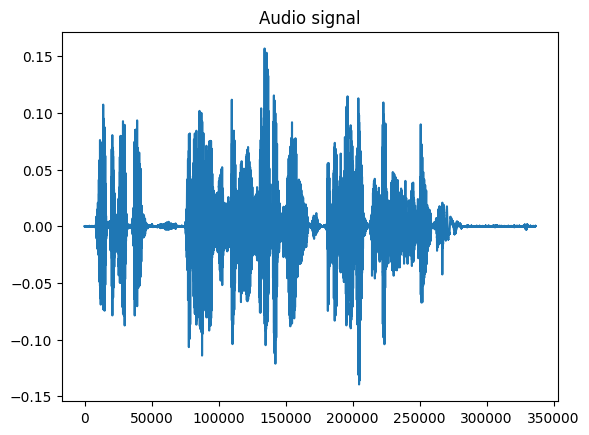

In [14]:
show_audio_signal(signal_sample)

In [7]:
import numpy as np
from scipy.signal import get_window
from librosa.util import normalize, pad_center

def window_sum_square(window, n_frames, hop_length=200, win_length=800,
                      n_fft=800, dtype=np.float32, norm=None):
    """
    Compute the sum-square envelope of a window function
    at a given hop length.

    This is used to estimate modulation effects induced by windowing
    observations in short-time fourier transforms.

    :param window: Window specification, as in `get_window`.
    :param n_frames: The number of analysis frames.
    :param hop_length: The number of samples to advance between frames.
    :param win_length: The length of the window function.
        By default, this matches `n_fft`.
    :param n_fft: The length of each analysis frame.
    :param dtype: The data type of the output.
    
    :return: The sum-squared envelope of the window function.
        shape: `(n_fft + hop_length * (n_frames - 1))`.
    :rtype: `np.ndarray`
    """
    if win_length is None:
        win_length = n_fft
    n = n_fft + hop_length * (n_frames - 1)
    x = np.zeros(n, dtype=dtype)

    # Compute the squared window at the desired length
    win_sq = get_window(window, win_length, fftbins=True)
    win_sq = normalize(win_sq, norm=norm)**2
    win_sq = pad_center(win_sq, size=n_fft)

    # Fill the develope
    for i in range(n_frames):
        sample = i * hop_length
        min_val1 = min(n, sample + n_fft)
        min_val2 = min(n_fft, n - sample)
        x[sample:min_val1] += win_sq[:max(0, min_val2)]
    return x

In [16]:
import torch
import numpy as np
import torch.nn.functional as F
from torch.autograd import Variable
from scipy.signal import get_window
from librosa.util import pad_center, tiny


class STFT(torch.nn.Module):
    """adapted from Prem Seetharaman's
    https://github.com/pseeth/pytorch-stft
    """
    def __init__(self, filter_length=800, hop_length=200, win_length=800,
                 window='hann'):
        super(STFT, self).__init__()
        self.filter_length = filter_length
        self.hop_length = hop_length
        self.win_length = win_length
        self.window = window
        self.forward_transform = None
        scale = self.filter_length / self.hop_length
        fourier_basis = np.fft.fft(np.eye(self.filter_length))

        cutoff = int((self.filter_length / 2 + 1))
        fourier_basis = np.vstack([np.real(fourier_basis[:cutoff, :]),
                                   np.imag(fourier_basis[:cutoff, :])])

        forward_basis = torch.FloatTensor(fourier_basis[:, None, :])
        inverse_basis = torch.FloatTensor(
            np.linalg.pinv(scale * fourier_basis).T[:, None, :])

        if window is not None:
            assert(filter_length >= win_length)
            # get window and zero center pad it to filter_length
            fft_window = get_window(window, win_length, fftbins=True)
            fft_window = pad_center(fft_window, size=filter_length)
            fft_window = torch.from_numpy(fft_window).float()

            # window the bases
            forward_basis *= fft_window
            inverse_basis *= fft_window

        self.register_buffer('forward_basis', forward_basis.float())
        self.register_buffer('inverse_basis', inverse_basis.float())

    def transform(self, input_data):
        num_batches = input_data.size(0)
        num_samples = input_data.size(1)

        self.num_samples = num_samples

        # similar to librosa, reflect-pad the input
        input_data = input_data.view(num_batches, 1, num_samples)
        input_data = F.pad(
            input_data.unsqueeze(1),
            (int(self.filter_length / 2), int(self.filter_length / 2), 0, 0),
            mode='reflect')
        input_data = input_data.squeeze(1)

        forward_transform = F.conv1d(
            input_data, Variable(self.forward_basis, requires_grad=False),
            stride=self.hop_length, padding=0
        )

        cutoff = int((self.filter_length / 2) + 1)
        real_part = forward_transform[:, :cutoff, :]
        imag_part = forward_transform[:, cutoff:, :]

        magnitude = torch.sqrt(real_part**2 + imag_part**2)
        phase = torch.autograd.Variable(
            torch.atan2(imag_part.data, real_part.data)
        )
        return magnitude, phase

    def inverse(self, magnitude, phase):
        recombine_magnitude_phase = torch.cat(
            [magnitude*torch.cos(phase), magnitude*torch.sin(phase)], dim=1)

        inverse_transform = F.conv_transpose1d(
            recombine_magnitude_phase,
            Variable(self.inverse_basis, requires_grad=False),
            stride=self.hop_length,
            padding=0
        )

        if self.window is not None:
            window_sum = window_sum_square(
                self.window, magnitude.size(-1), hop_length=self.hop_length,
                win_length=self.win_length, n_fft=self.filter_length,
                dtype=np.float32)
            # remove modulation effects
            approx_nonzero_indices = torch.from_numpy(
                np.where(window_sum > tiny(window_sum))[0])
            window_sum = torch.autograd.Variable(
                torch.from_numpy(window_sum), requires_grad=False)
            window_sum = window_sum.cuda() if magnitude.is_cuda else window_sum
            inverse_transform[:, :, approx_nonzero_indices] /= \
                window_sum[approx_nonzero_indices]

            # scale by hop ratio
            inverse_transform *= float(self.filter_length) / self.hop_length

        half_filter_length = int(self.filter_length/2)
        inverse_transform = inverse_transform[:, :, half_filter_length:]
        inverse_transform = inverse_transform[:, :, :half_filter_length:]

        return inverse_transform

    def forward(self, input_data):
        """
        Compute the transformation and its inverse.
        """
        self.magnitude, self.phase = self.transform(input_data)
        reconstruction = self.inverse(self.magnitude, self.phase)
        return reconstruction

In [9]:
signal_reshape = np.reshape(signal_sample, (1, signal_sample.shape[0]))
signal_reshape = torch.tensor(signal_reshape)
print(signal_reshape.shape)

torch.Size([1, 336600])


In [18]:
stft_transformation = STFT()
magnitude, phase = stft_transformation.transform(signal_reshape)
print('magnitude:', magnitude.shape)
print('phase:', phase.shape)

magnitude: torch.Size([1, 401, 1684])
phase: torch.Size([1, 401, 1684])


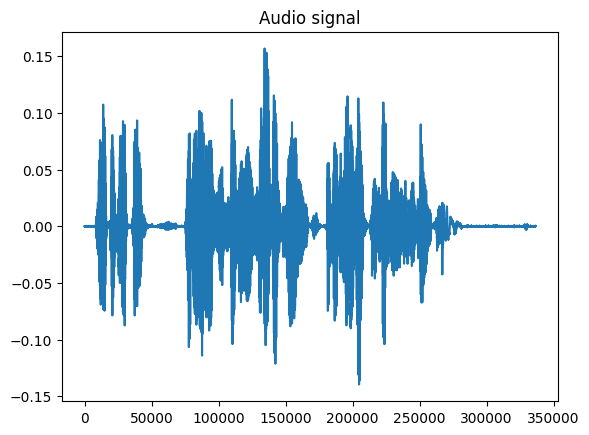

In [17]:
original_signal = stft_transformation.inverse(magnitude, phase)
original_signal = original_signal.numpy()
show_audio_signal(original_signal)

## Programmation de la dataset

In [19]:
import torch

def dynamic_range_compression(x, C=1, clip_val=1e-5):
    """
    PARAMS
    ------
    C: compression factor
    """
    return torch.log(torch.clamp(x, min=clip_val) * C)

In [ ]:
import torch

def dynamic_range_decompression(x, C=1):
    """
    PARAMS
    ------
    C: compression factor used to compress
    """
    return torch.exp(x) / C

In [22]:
import torch
from librosa.filters import mel as librosa_mel_fn
from torch import nn

class TacotronSTFT(nn.Module):
    def __init__(self, filter_length=1024, hop_length=256, win_length=1024,
                 n_mel_channels=80, sampling_rate=22050, mel_fmin=0.0,
                 mel_fmax=8000.0):
        super().__init__()
        self.n_mel_channels = n_mel_channels
        self.sampling_rate = sampling_rate
        self.stft_fn = STFT(filter_length, hop_length, win_length)
        mel_basis = librosa_mel_fn(
            sampling_rate, filter_length, n_mel_channels, mel_fmin, mel_fmax)
        mel_basis = torch.from_numpy(mel_basis).float()
        self.register_buffer('mel_basis', mel_basis)

    def spectral_normalize(self, magnitudes):
        output = dynamic_range_compression(magnitudes)
        return output

    def spectral_de_normalize(self, magnitudes):
        output = dynamic_range_decompression(magnitudes)
        return output

    def mel_spectrogram(self, y):
        """Computes mel-spectrograms from a batch of waves
        PARAMS
        ------
        y: Variable(torch.FloatTensor) with shape (B, T) in range [-1, 1]

        RETURNS
        -------
        mel_output: torch.FloatTensor of shape (B, n_mel_channels, T)
        """
        assert(torch.min(y.data) >= -1)
        assert(torch.max(y.data) <= 1)

        magnitudes, _phases = self.stft_fn.transform(y)
        magnitudes = magnitudes.data
        mel_output = torch.matmul(self.mel_basis, magnitudes)
        mel_output = self.spectral_normalize(mel_output)
        return mel_output

In [ ]:
import random
import torch
from torch.autograd import Variable
from torch.utils.data import Dataset

class TextMelLoader(Dataset):
    """
        1) loads audio,text pairs
        2) normalizes text and converts them to sequences of one-hot vectors
        3) computes mel-spectrograms from audio files.
    """
    def __init__(self, audiopaths_and_text, hparams):
        self.audiopaths_and_text = load_filepaths_and_text(audiopaths_and_text)
        self.text_cleaners = hparams.text_cleaners
        self.max_wav_value = hparams.max_wav_value
        self.sampling_rate = hparams.sampling_rate
        self.load_mel_from_disk = hparams.load_mel_from_disk
        self.stft = TacotronSTFT(
            hparams.filter_length, hparams.hop_length, hparams.win_length,
            hparams.n_mel_channels, hparams.sampling_rate, hparams.mel_fmin,
            hparams.mel_fmax
        )
        random.seed(hparams.seed)
        random.shuffle(self.audiopaths_and_text)

    def get_mel_text_pair(self, audiopath_and_text):
        # separate filename and text
        audiopath, text = audiopath_and_text[0], audiopath_and_text[1]
        text = self.get_text(text)
        mel = self.get_mel(audiopath)
        return (text, mel)

    def get_mel(self, filename):
        if not self.load_mel_from_disk:
            audio, sampling_rate = load_wav_to_torch(filename)
            if sampling_rate != self.stft.sampling_rate:
                raise ValueError("{} {} SR doesn't match target {} SR".format(
                    sampling_rate, self.stft.sampling_rate))
            audio_norm = audio / self.max_wav_value
            audio_norm = audio_norm.unsqueeze(0)
            audio_norm = Variable(audio_norm, requires_grad=False)
            melspec = self.stft.mel_spectrogram(audio_norm)
            melspec = torch.squeeze(melspec, 0)
        else:
            melspec = torch.from_numpy(np.load(filename))
            assert melspec.size(0) == self.stft.n_mel_channels, (
                'Mel dimension mismatch: given {}, expected {}'.format(
                    melspec.size(0), self.stft.n_mel_channels))
        return melspec

    def get_text(self, text):
        text_norm = torch.IntTensor(text_to_sequence(text, self.text_cleaners))
        return text_norm

    def __getitem__(self, index):
        return self.get_mel_text_pair(self.audiopaths_and_text[index])

    def __len__(self):
        return len(self.audiopaths_and_text)
